# Principal component analysis (PCA)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA

## US Arrests Dataset

In [3]:
us_arrests_data = pd.read_csv("Data/USArrests.csv", na_values='?').drop(['Unnamed: 0'], axis = 1).dropna()
us_arrests_data.head(10)

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


In [4]:
us_arrests_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0 KB


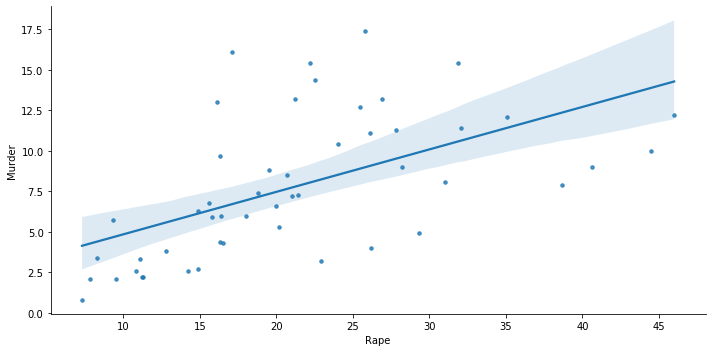

In [5]:
sns.lmplot(x = "Rape", y = "Murder", data = us_arrests_data, 
           fit_reg=True, scatter_kws = {'s':12}, aspect = 2)
plt.show()

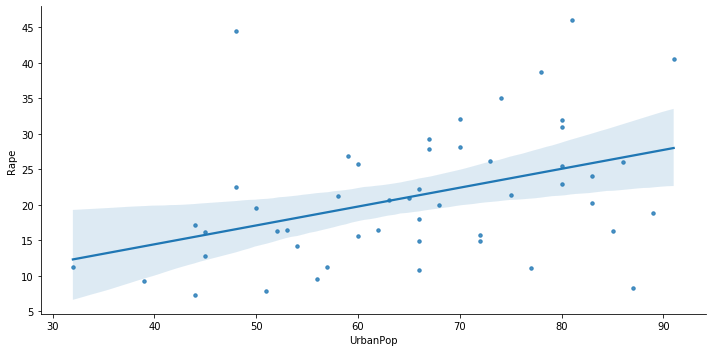

In [6]:
sns.lmplot(x = "UrbanPop", y = "Rape", data = us_arrests_data, 
           fit_reg=True, scatter_kws = {'s':12}, aspect = 2)
plt.show()

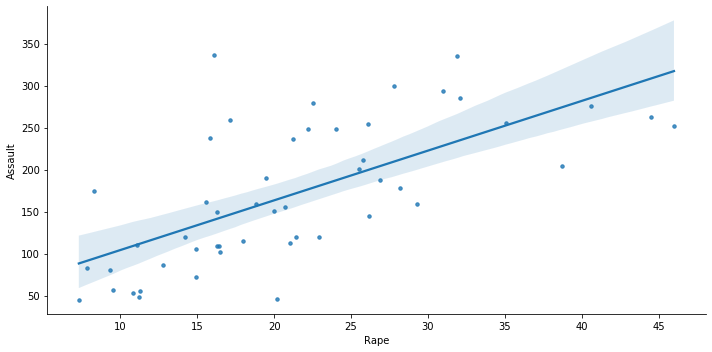

In [7]:
sns.lmplot(x = "Rape", y = "Assault", data = us_arrests_data, 
           fit_reg=True, scatter_kws = {'s':12}, aspect = 2)
plt.show()

In [8]:
X = pd.DataFrame(scale(us_arrests_data), index = us_arrests_data.index, columns = us_arrests_data.columns)
X.head(10)

,Murder,Assault,UrbanPop,Rape
0,1.255179,0.790787,-0.526195,-0.003451
1,0.513019,1.118060,-1.224067,2.509424
2,0.072361,1.493817,1.009122,1.053466
3,0.234708,0.233212,-1.084492,-0.186794
4,0.281093,1.275635,1.776781,2.088814
5,0.025976,0.402909,0.869548,1.883901
6,-1.040880,-0.736484,0.799761,-1.092723
7,-0.437875,0.815030,0.450825,-0.585834
8,1.765415,1.990786,1.009122,1.150530
9,2.229265,0.487757,-0.386621,0.492653


In [9]:
model_pca = PCA(n_components=4)
print(model_pca)

PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)


In [10]:
model_pca_fit = model_pca.fit(X)
model_pca_fit.components_

array([[ 0.53589947,  0.58318363,  0.27819087,  0.54343209],
       [ 0.41818087,  0.1879856 , -0.87280619, -0.16731864],
       [-0.34123273, -0.26814843, -0.37801579,  0.81777791],
       [ 0.6492278 , -0.74340748,  0.13387773,  0.08902432]])

In [11]:
pca_loadings = pd.DataFrame(model_pca_fit.components_.T, index = us_arrests_data.columns, 
                            columns=['V1', 'V2', 'V3', 'V4'])
pca_loadings

,V1,V2,V3,V4
Murder,0.535899,0.418181,-0.341233,0.649228
Assault,0.583184,0.187986,-0.268148,-0.743407
UrbanPop,0.278191,-0.872806,-0.378016,0.133878
Rape,0.543432,-0.167319,0.817778,0.089024


In [12]:
data_pca = pd.DataFrame(model_pca_fit.fit_transform(X), columns=['PC1', 'PC2', 'PC3', 'PC4'], index=X.index)
data_pca.head(10)

,PC1,PC2,PC3,PC4
0,0.985566,1.133392,-0.444269,0.156267
1,1.950138,1.073213,2.040003,-0.438583
2,1.763164,-0.745957,0.054781,-0.834653
3,-0.141420,1.119797,0.114574,-0.182811
4,2.523980,-1.542934,0.598557,-0.341996
5,1.514563,-0.987555,1.095007,0.001465
6,-1.358647,-1.088928,-0.643258,-0.118469
7,0.047709,-0.325359,-0.718633,-0.881978
8,3.013042,0.039229,-0.576829,-0.096285
9,1.639283,1.278942,-0.342460,1.076797


In [13]:
print("Standard deviation of the four principal components: %s" % np.sqrt(model_pca.explained_variance_))

Standard deviation of the four principal components: [1.5908673  1.00496987 0.6031915  0.4206774 ]


In [14]:
print("Percentage of variance explained by each of the selected components: %s" % 
      model_pca.explained_variance_ratio_)

Percentage of variance explained by each of the selected components: [0.62006039 0.24744129 0.0891408  0.04335752]


In [15]:
print("Cumulative sum of the elements: %s" % np.cumsum(model_pca.explained_variance_ratio_))

Cumulative sum of the elements: [0.62006039 0.86750168 0.95664248 1.        ]


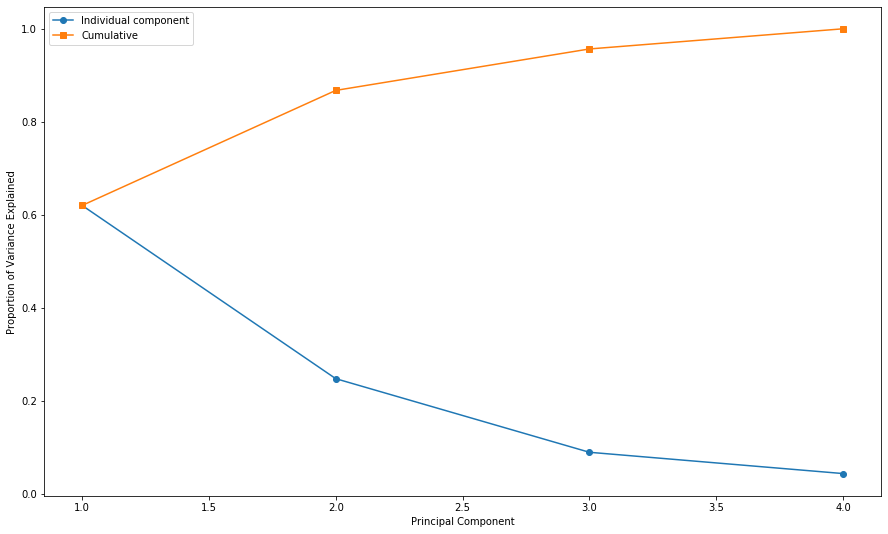

In [16]:
plt.figure(figsize=(15,9))

x_grid = np.arange(1, np.cumsum(model_pca.explained_variance_ratio_).shape[0] + 1)

plt.plot(x_grid, model_pca.explained_variance_ratio_, '-o', label='Individual component')
plt.plot(x_grid, np.cumsum(model_pca.explained_variance_ratio_), '-s', label='Cumulative')

plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')

plt.legend()
plt.show()

***